# Ejercitación: Detección morrones

Segmentación por color

In [24]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
#%matplotlib qt

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

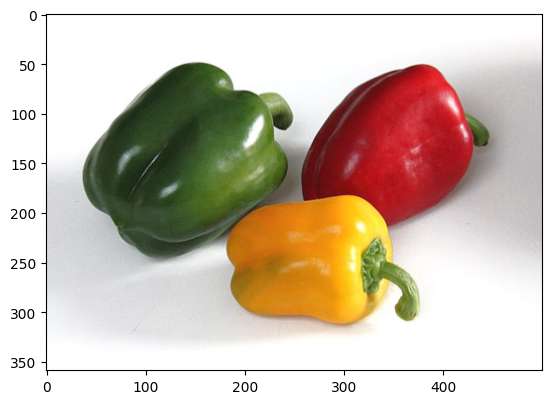

In [25]:
# Cargar la imagen color
img_color = cv.imread('pimiento_morron.jpg')
imgRGB = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

plt.figure(1)
plt.imshow(imgRGB)
plt.show()

En este caso, el morron amarillo no es tan monotono como la mesa. Por lo tanto trabajamos en RGB para segmentar.

Tomamos una muestra del morron amarillo:

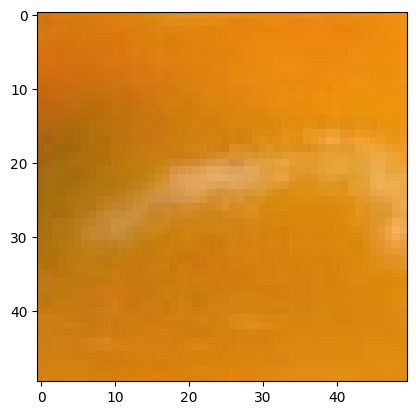

In [26]:
img_muestra = imgRGB[230:280, 230:280,:]
plt.figure(2)
plt.imshow(img_muestra)
plt.show()

Calculamos un modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB:

In [27]:
color_mean, color_std = cv.meanStdDev(img_muestra)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

[213.66680000000002, 132.0984, 21.5452]
[16.6917398062632, 12.948695588359449, 15.321121269672139]


Asumiendo que la distribución es Gaussiana, pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas para "capturar" el 99.7 % de pixeles:

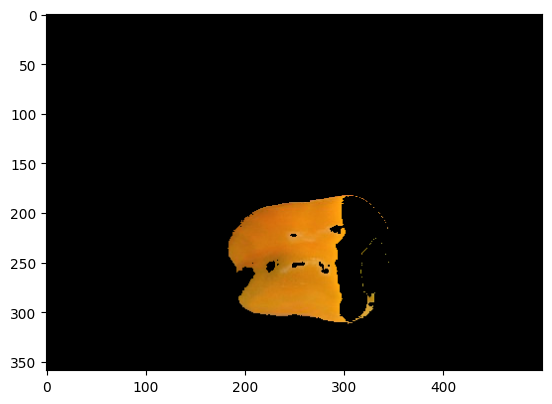

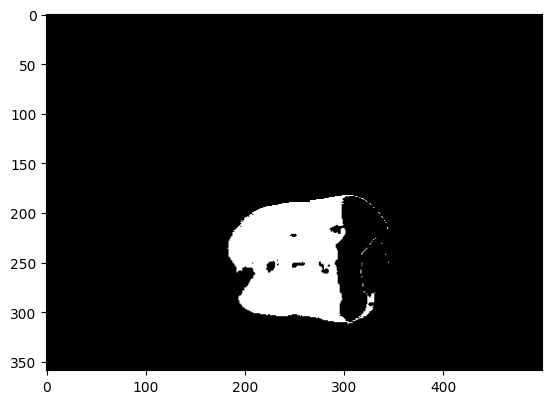

In [28]:
n_sigma = 3
mask = cv.inRange(imgRGB, color_mean - (color_std * n_sigma),  color_mean + (color_std * n_sigma))
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask, cmap='gray')
plt.show()

Veamos la distribucion de colores:

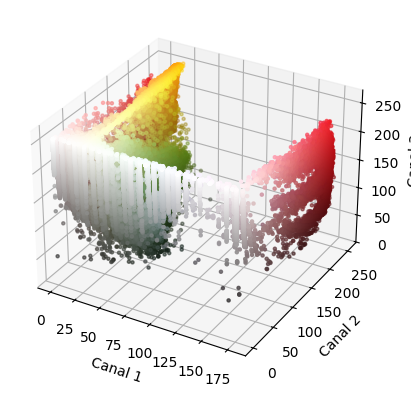

In [29]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

img_HSV = cv.cvtColor(img_color, cv.COLOR_BGR2HSV)
c1, c2, c3 = cv.split(img_HSV)

#c1, c2, c3 = cv.split(imgRGB)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

En RGB vemos que la distribución de los colores no es normal. Pero en HSV podemos determinar el rango del amarillo y con eso segmentar la imagen:

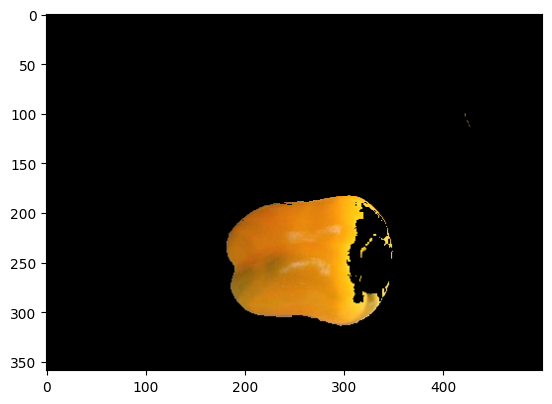

In [30]:
color_l = (14, 100, 100)
color_u = (24, 255, 255)

mask = cv.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(6)
plt.imshow(img_segmentada)
plt.show()